In [1]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
test_size = x_test.shape[0]
batch_size = 128
max_iterations = 1000
mi = np.arange(max_iterations)
optimizer = AdaGrad()
markers = {'sigmoid':"x", 'relu':"s", 'nSigmoid':"D"}

In [3]:
def test(act_list):
    networks = {}
    train_acc = {}
    train_loss = {}
    test_acc = {}
    test_loss = {}
    optimizer = {}


    for key in act_list:
        # 기록 리스트 생성
        train_acc[key] = []
        train_loss[key] = []
        test_acc[key] = []
        test_loss[key] = []

        # nSigmoid 경우 파라미터
        # key == 'nSigmoid_8' -> act = nSigmoid, threshold = 8
        paramKey = key
        paramT = 0.5

        if paramKey not in ['sigmoid', 'relu']:
            paramKey, paramT = key.split('_')
            paramT = float(paramT)
        w_std = 'he'
        if key != 'relu':
            w_std = 'xavier'

        # 네트워크와 optimizer 생성
        networks[key] = MultiLayerNet(
            input_size=784, hidden_size_list=[100, 100, 100, 100],
            output_size=10, activation=paramKey, weight_init_std=w_std, threshold=paramT)
        optimizer[key] = AdaGrad()


    # 학습
    for i in range(max_iterations):

        # mini-batch train
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # mini-batch test
        batch_mask_t = np.random.choice(test_size, batch_size)
        x_batch_t = x_test[batch_mask_t]
        t_batch_t = t_test[batch_mask_t]

        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")

        # 학습
        for key in act_list:
            # 학습
            grads = networks[key].gradient(x_batch, t_batch)
            optimizer[key].update(networks[key].params, grads)

            # 기록
            train_acc[key].append(networks[key].accuracy(x_batch, t_batch))
            train_loss[key].append(networks[key].loss(x_batch, t_batch))
            test_acc[key].append(networks[key].accuracy(x_batch_t, t_batch_t))
            test_loss[key].append(networks[key].loss(x_batch_t, t_batch_t))

            # 100회마다 경과 출력
            if i % 100 == 0:
                # print(key + " loss:" + str(acc))
                t_loss = networks[key].loss(x_batch_t, t_batch_t)
                print(key + " loss:" + str(t_loss))

    return train_acc, train_loss, test_acc, test_loss


def plot(label, datas, t_list, *y_lim):
    for key in t_list:
        plt.plot(mi, smooth_curve(datas[key]), markevery=50, label=key)
    plt.xlabel("iterations")
    plt.ylabel(label)
    if y_lim:
        plt.ylim(y_lim)
    plt.legend()
    plt.show()

In [4]:
test_list = ['relu', 'tSigmoid_0.5', 'nSigmoid_6']

train_acc, train_loss, test_acc, test_loss = test(test_list)

===========iteration:0===========
relu loss:2.1916174165531275
tSigmoid_0.5 loss:2.441850865091416
nSigmoid_6 loss:2.613614241166605
===========iteration:100===========
relu loss:0.22072294257571062
tSigmoid_0.5 loss:0.277187745167926
nSigmoid_6 loss:0.3635510715526608
[4.23454259 2.98272339 6.00173544 5.07311689 2.98272339 5.84129
 5.33677183 3.90848502 6.00519596 4.94258342 4.80624104 3.24649858
 4.54368321 5.98951389 5.08315849 3.97354347 2.60205999 2.924796
 3.41514035 3.43200669 3.112605   4.56206673 5.89192141 5.5372762
 3.28690535 4.18684337 4.96859968 5.99564616 3.08813609 5.28492904
 2.         6.00433212 3.76162718 3.34419572 3.87903851 5.6701122
 3.39794001 2.         5.95636103 2.60205999 4.5483157  5.66245939
 3.73846344 5.98510704 5.6976094  2.29225607 2.08278537 5.99127039
 5.97889964 5.99039258 2.40823997 2.35218252 3.20411998 5.85268489
 3.24649858 3.85883785 2.35218252 3.06295783 2.40823997 5.24235256
 4.20760744 5.95636103 2.51054501 6.00346743 5.88896534 5.30255603


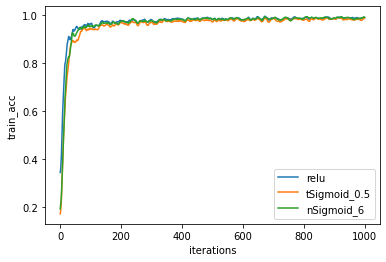

In [5]:
plot('train_acc', train_acc, test_list)

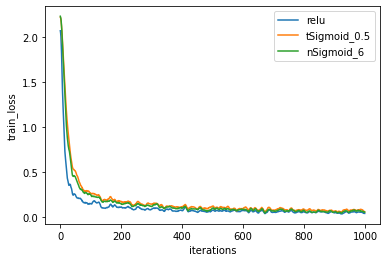

In [6]:
plot('train_loss', train_loss, test_list)

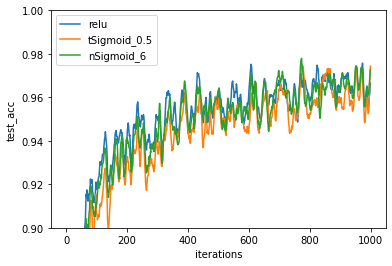

In [7]:
plot('test_acc', test_acc, test_list, *(0.9, 1))

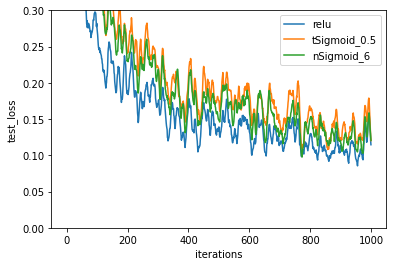

In [8]:
plot('test_loss', test_loss, test_list, *(0,0.3))

In [9]:
for key in test_list:
    print(key + " best train_acc:" + str(max(train_acc[key])))
    print(key + " best train_loss:" + str(min(train_loss[key])))
    print(key + " best test_acc:" + str(max(test_acc[key])))
    print(key + " best test_loss:" + str(min(test_loss[key])) + "\n")

relu best train_acc:1.0
relu best train_loss:0.010901883765199107
relu best test_acc:1.0
relu best test_loss:0.023349345859068282

tSigmoid_0.5 best train_acc:1.0
tSigmoid_0.5 best train_loss:0.019761620555734022
tSigmoid_0.5 best test_acc:1.0
tSigmoid_0.5 best test_loss:0.04457752136824398

nSigmoid_6 best train_acc:1.0
nSigmoid_6 best train_loss:0.022361531563652958
nSigmoid_6 best test_acc:1.0
nSigmoid_6 best test_loss:0.0341707397521227



In [10]:
# act = ['nSigmoid']
# for i in range(1):
#     print(i)
#     t_a, t_l = test(0.5, act)
#
#     with open('./result/128_10/test/3.txt', 'a') as f:
#         for key in act:
#             f.write(str(i) + " best acc: " + str(max(t_a[key])) + '\n')
#             f.write(str(i) + " best loss: " + str(min(t_l[key])) + '\n')
